### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

#1. Análise do faturamento



📊 RESUMO DE FATURAMENTO (Preço + Frete):
     Loja  Faturamento Total
0  Loja 1       1.616347e+06
1  Loja 2       1.567773e+06
2  Loja 3       1.542048e+06
3  Loja 4       1.458253e+06

🔍 DETALHES:
Faturamento Combinado (Todas as Lojas): R$ 6,184,421.45
Média por Loja: R$ 1,546,105.36
Loja com Maior Faturamento: Loja 1
Loja com Menor Faturamento: Loja 4


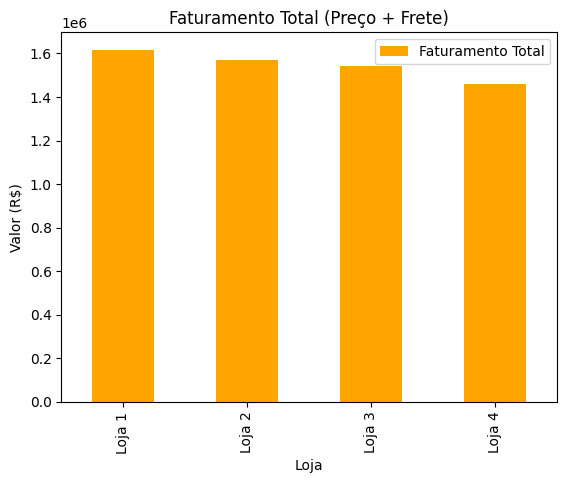

In [ ]:
faturamento_loja1 = (loja1['Preço'].fillna(0) + loja1['Frete'].fillna(0)).sum()
faturamento_loja2 = (loja2['Preço'].fillna(0) + loja2['Frete'].fillna(0)).sum()
faturamento_loja3 = (loja3['Preço'].fillna(0) + loja3['Frete'].fillna(0)).sum()
faturamento_loja4 = (loja4['Preço'].fillna(0) + loja4['Frete'].fillna(0)).sum()

resumo_faturamento = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

faturamento_combinado = resumo_faturamento['Faturamento Total'].sum()
media_por_loja = resumo_faturamento['Faturamento Total'].mean()
loja_maior = resumo_faturamento.loc[resumo_faturamento['Faturamento Total'].idxmax(), 'Loja']
loja_menor = resumo_faturamento.loc[resumo_faturamento['Faturamento Total'].idxmin(), 'Loja']

print("\n📊 RESUMO DE FATURAMENTO (Preço + Frete):")
print(resumo_faturamento)
print("\n🔍 DETALHES:")
print(f"Faturamento Combinado (Todas as Lojas): R$ {faturamento_combinado:,.2f}")
print(f"Média por Loja: R$ {media_por_loja:,.2f}")
print(f"Loja com Maior Faturamento: {loja_maior}")
print(f"Loja com Menor Faturamento: {loja_menor}")

resumo_faturamento.plot(x='Loja', y='Faturamento Total', kind='bar',
                       color='orange', title='Faturamento Total (Preço + Frete)')
plt.ylabel('Valor (R$)')
plt.show()



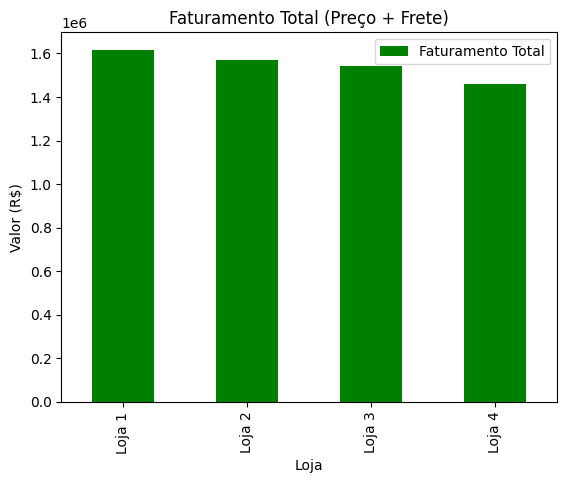

In [ ]:
resumo_faturamento.plot(x='Loja', y='Faturamento Total', kind='bar', color='green', title='Faturamento Total (Preço + Frete)')
plt.ylabel('Valor (R$)')
plt.show()

# 2. Vendas por Categoria


In [ ]:
def contar_categorias(df_loja, nome_loja):
    """Conta as ocorrências de cada categoria em uma loja."""

    col_categoria = [col for col in df_loja.columns if 'categoria' in col.lower()][0]

    contagem_categorias = df_loja[col_categoria].value_counts().reset_index()
    contagem_categorias.columns = ['categoria_do_produto', 'Quantidade_Vendida']
    contagem_categorias['Loja'] = nome_loja
    return contagem_categorias

categorias_loja1 = contar_categorias(loja1, 'Loja 1')
categorias_loja2 = contar_categorias(loja2, 'Loja 2')
categorias_loja3 = contar_categorias(loja3, 'Loja 3')
categorias_loja4 = contar_categorias(loja4, 'Loja 4')

categorias_todas_lojas = pd.concat([
    categorias_loja1,
    categorias_loja2,
    categorias_loja3,
    categorias_loja4
], axis=0, ignore_index=True)

print("\n📊 QUANTIDADE DE VENDAS POR CATEGORIA EM CADA LOJA:")
print(categorias_todas_lojas)

print("\n⭐ CATEGORIAS MAIS VENDIDAS POR LOJA:")
for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    df_loja = categorias_todas_lojas[categorias_todas_lojas['Loja'] == loja]
    if not df_loja.empty:
        top_categoria = df_loja.nlargest(1, 'Quantidade_Vendida')
        print(f"{loja}: {top_categoria['categoria_do_produto'].values[0]} ({top_categoria['Quantidade_Vendida'].values[0]} vendas)")




📊 QUANTIDADE DE VENDAS POR CATEGORIA EM CADA LOJA:
     categoria_do_produto  Quantidade_Vendida    Loja
0                  moveis                 465  Loja 1
1             eletronicos                 448  Loja 1
2              brinquedos                 324  Loja 1
3        eletrodomesticos                 312  Loja 1
4         esporte e lazer                 284  Loja 1
5   instrumentos musicais                 182  Loja 1
6                  livros                 173  Loja 1
7   utilidades domesticas                 171  Loja 1
8                  moveis                 442  Loja 2
9             eletronicos                 422  Loja 2
10             brinquedos                 313  Loja 2
11       eletrodomesticos                 305  Loja 2
12        esporte e lazer                 275  Loja 2
13  instrumentos musicais                 224  Loja 2
14                 livros                 197  Loja 2
15  utilidades domesticas                 181  Loja 2
16                 moveis     

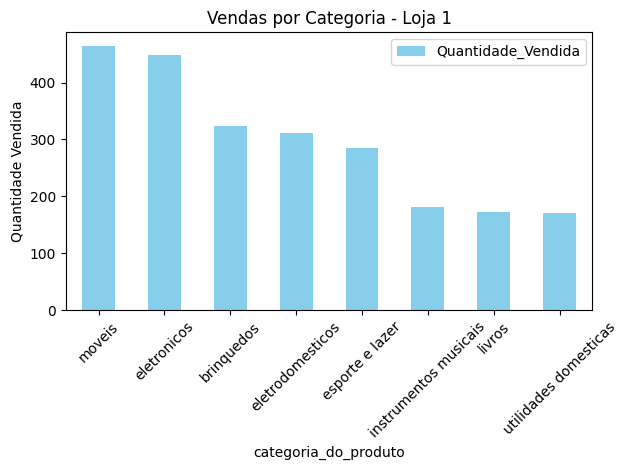

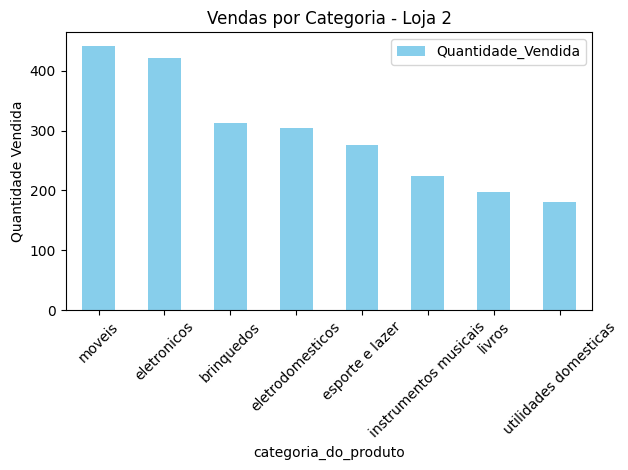

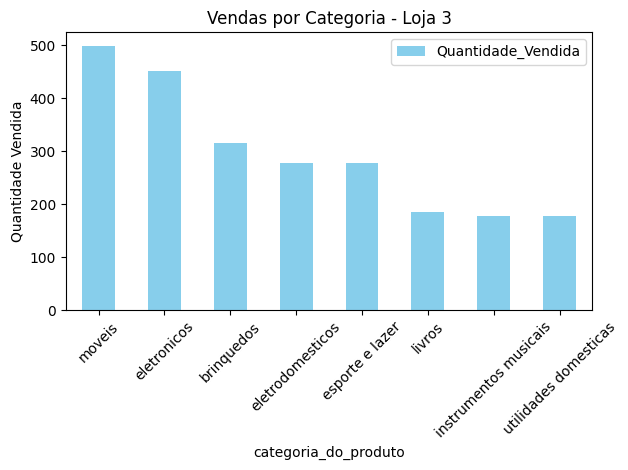

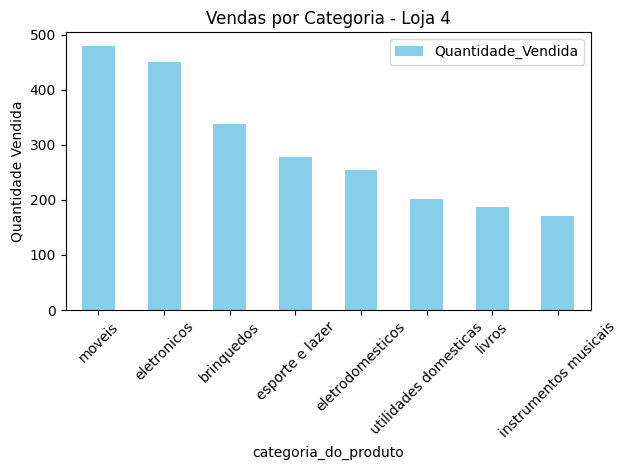

In [ ]:

for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    df_loja = categorias_todas_lojas[categorias_todas_lojas['Loja'] == loja]
    if not df_loja.empty:
        df_loja.plot(x='categoria_do_produto', y='Quantidade_Vendida', kind='bar',
                    title=f'Vendas por Categoria - {loja}', color='skyblue')
        plt.xticks(rotation=45)
        plt.ylabel('Quantidade Vendida')
        plt.tight_layout()
        plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:

media_avaliacao_loja1 = loja1['Avaliação da compra'].mean()
media_avaliacao_loja2 = loja2['Avaliação da compra'].mean()
media_avaliacao_loja3 = loja3['Avaliação da compra'].mean()
media_avaliacao_loja4 = loja4['Avaliação da compra'].mean()

resumo_avaliacoes = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Média de Avaliação': [media_avaliacao_loja1, media_avaliacao_loja2,
                          media_avaliacao_loja3, media_avaliacao_loja4]
})

print("\n⭐ MÉDIA DE AVALIAÇÕES POR LOJA:")
print(resumo_avaliacoes)

melhor_avaliacao = resumo_avaliacoes.loc[resumo_avaliacoes['Média de Avaliação'].idxmax()]
pior_avaliacao = resumo_avaliacoes.loc[resumo_avaliacoes['Média de Avaliação'].idxmin()]

print("\n🔍 DESTAQUES DE AVALIAÇÃO:")
print(f"Loja com Melhor Avaliação: {melhor_avaliacao['Loja']} ({melhor_avaliacao['Média de Avaliação']:.2f} pontos)")
print(f"Loja com Pior Avaliação: {pior_avaliacao['Loja']} ({pior_avaliacao['Média de Avaliação']:.2f} pontos)")




⭐ MÉDIA DE AVALIAÇÕES POR LOJA:
     Loja  Média de Avaliação
0  Loja 1            3.976685
1  Loja 2            4.037304
2  Loja 3            4.048326
3  Loja 4            3.995759

🔍 DESTAQUES DE AVALIAÇÃO:
Loja com Melhor Avaliação: Loja 3 (4.05 pontos)
Loja com Pior Avaliação: Loja 1 (3.98 pontos)


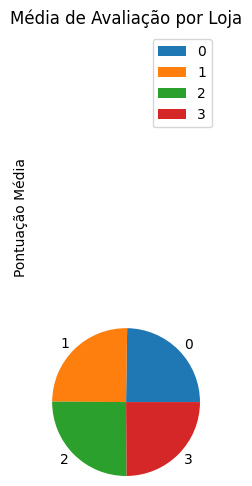

In [ ]:
resumo_avaliacoes.plot(x='Loja', y='Média de Avaliação', kind='pie',
                      color='purple', title='Média de Avaliação por Loja')
plt.ylabel('Pontuação Média')
plt.ylim(0, 5)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [ ]:

def analisar_produtos(df_loja, nome_loja):
    """Analisa os produtos mais e menos vendidos por loja"""
    vendas_por_produto = df_loja['Produto'].value_counts().reset_index()
    vendas_por_produto.columns = ['Produto', 'Quantidade Vendida']

    faturamento_por_produto = df_loja.groupby('Produto')['Preço'].sum().reset_index()
    faturamento_por_produto.columns = ['Produto', 'Faturamento Total']

    analise_produtos = pd.merge(vendas_por_produto, faturamento_por_produto, on='Produto')
    analise_produtos['Loja'] = nome_loja

    analise_produtos = analise_produtos.sort_values('Quantidade Vendida', ascending=False)

    return analise_produtos


produtos_loja1 = analisar_produtos(loja1, 'Loja 1')
produtos_loja2 = analisar_produtos(loja2, 'Loja 2')
produtos_loja3 = analisar_produtos(loja3, 'Loja 3')
produtos_loja4 = analisar_produtos(loja4, 'Loja 4')


todos_produtos = pd.concat([
    produtos_loja1,
    produtos_loja2,
    produtos_loja3,
    produtos_loja4
], ignore_index=True)

# --- RESULTADOS ---
print("\n🚀 PRODUTOS MAIS VENDIDOS POR LOJA:")
for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    df_loja = todos_produtos[todos_produtos['Loja'] == loja]
    if not df_loja.empty:
        top_produto = df_loja.iloc[0]
        print(f"\n{loja}:")
        print(f"Produto Mais Vendido: {top_produto['Produto']}")
        print(f"Quantidade: {top_produto['Quantidade Vendida']} unidades")
        print(f"Faturamento: R$ {top_produto['Faturamento Total']:,.2f}")

print("\n🐢 PRODUTOS MENOS VENDIDOS POR LOJA:")
for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    df_loja = todos_produtos[todos_produtos['Loja'] == loja]
    if not df_loja.empty:
        menos_vendido = df_loja.iloc[-1]
        print(f"\n{loja}:")
        print(f"Produto Menos Vendido: {menos_vendido['Produto']}")
        print(f"Quantidade: {menos_vendido['Quantidade Vendida']} unidades")
        print(f"Faturamento: R$ {menos_vendido['Faturamento Total']:,.2f}")





🚀 PRODUTOS MAIS VENDIDOS POR LOJA:

Loja 1:
Produto Mais Vendido: Micro-ondas
Quantidade: 60 unidades
Faturamento: R$ 46,348.89

Loja 2:
Produto Mais Vendido: Iniciando em programação
Quantidade: 65 unidades
Faturamento: R$ 4,169.96

Loja 3:
Produto Mais Vendido: Kit banquetas
Quantidade: 57 unidades
Faturamento: R$ 22,265.96

Loja 4:
Produto Mais Vendido: Cama box
Quantidade: 62 unidades
Faturamento: R$ 43,928.57

🐢 PRODUTOS MENOS VENDIDOS POR LOJA:

Loja 1:
Produto Menos Vendido: Celular ABXY
Quantidade: 33 unidades
Faturamento: R$ 43,534.47

Loja 2:
Produto Menos Vendido: Jogo de tabuleiro
Quantidade: 32 unidades
Faturamento: R$ 7,749.58

Loja 3:
Produto Menos Vendido: Blocos de montar
Quantidade: 35 unidades
Faturamento: R$ 1,649.81

Loja 4:
Produto Menos Vendido: Guitarra
Quantidade: 33 unidades
Faturamento: R$ 34,430.67



📊 VISUALIZAÇÃO DOS PRODUTOS MAIS VENDIDOS:


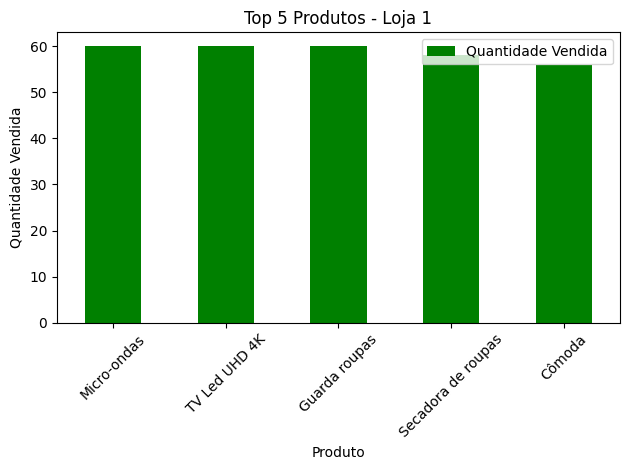

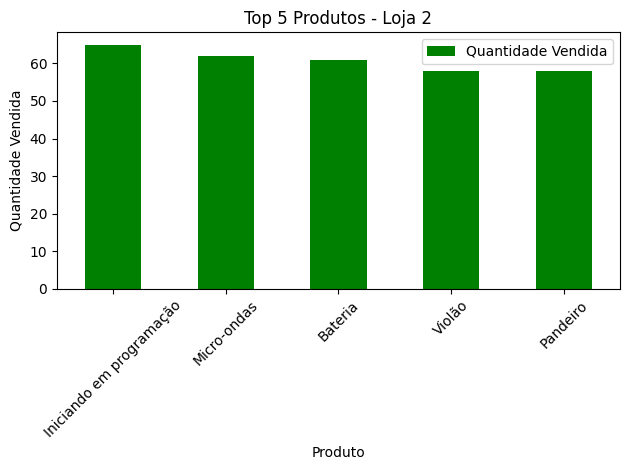

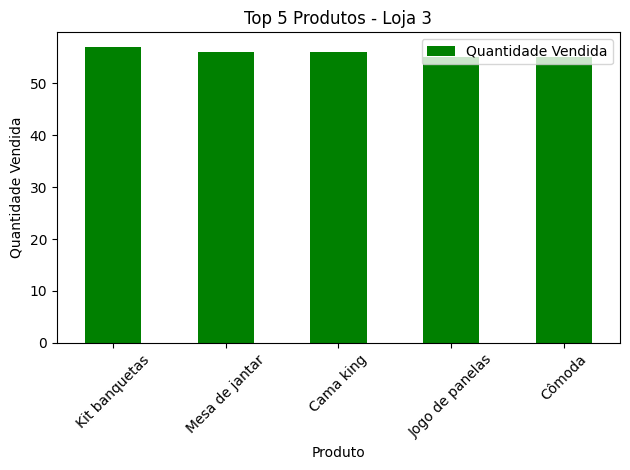

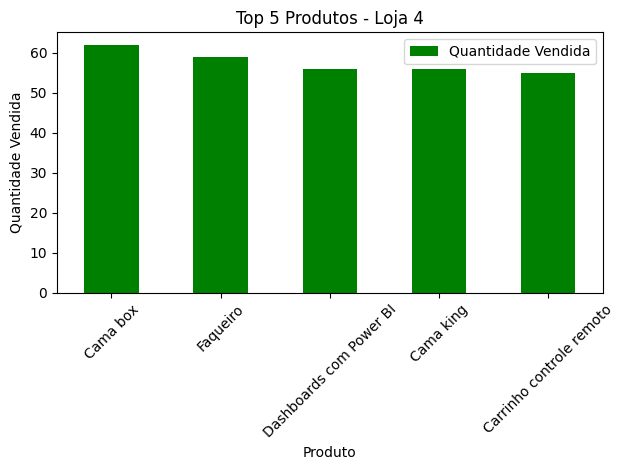

In [ ]:
print("\n📊 VISUALIZAÇÃO DOS PRODUTOS MAIS VENDIDOS:")
for loja in ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']:
    df_loja = todos_produtos[todos_produtos['Loja'] == loja].head(5)
    if not df_loja.empty:
        df_loja.plot(x='Produto', y='Quantidade Vendida', kind='bar',
                    title=f'Top 5 Produtos - {loja}', color='green')
        plt.xticks(rotation=45)
        plt.ylabel('Quantidade Vendida')
        plt.tight_layout()
        plt.show()

[texto do link](https://)# 5. Frete Médio por Loja


In [103]:
frete_medio_loja1 = loja1['Frete'].mean(skipna=True)
frete_medio_loja2 = loja2['Frete'].mean(skipna=True)
frete_medio_loja3 = loja3['Frete'].mean(skipna=True)
frete_medio_loja4 = loja4['Frete'].mean(skipna=True)


resumo_frete = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio': [frete_medio_loja1, frete_medio_loja2,
                   frete_medio_loja3, frete_medio_loja4],
    'Total de Fretes Calculados': [
        loja1['Frete'].count(),
        loja2['Frete'].count(),
        loja3['Frete'].count(),
        loja4['Frete'].count()
    ]
})


print("\n🚚 FRETE MÉDIO POR LOJA (VALORES NULOS IGNORADOS):")
print(resumo_frete)

maior_frete = resumo_frete.loc[resumo_frete['Frete Médio'].idxmax()]
menor_frete = resumo_frete.loc[resumo_frete['Frete Médio'].idxmin()]

print("\n🔍 DESTAQUES DE FRETE:")
print(f"Loja com Maior Frete Médio: {maior_frete['Loja']} (R$ {maior_frete['Frete Médio']:.2f})")
print(f"Loja com Menor Frete Médio: {menor_frete['Loja']} (R$ {menor_frete['Frete Médio']:.2f})")




🚚 FRETE MÉDIO POR LOJA (VALORES NULOS IGNORADOS):
     Loja  Frete Médio  Total de Fretes Calculados
0  Loja 1    34.691805                        2359
1  Loja 2    33.621941                        2359
2  Loja 3    33.074464                        2359
3  Loja 4    31.278997                        2358

🔍 DESTAQUES DE FRETE:
Loja com Maior Frete Médio: Loja 1 (R$ 34.69)
Loja com Menor Frete Médio: Loja 4 (R$ 31.28)


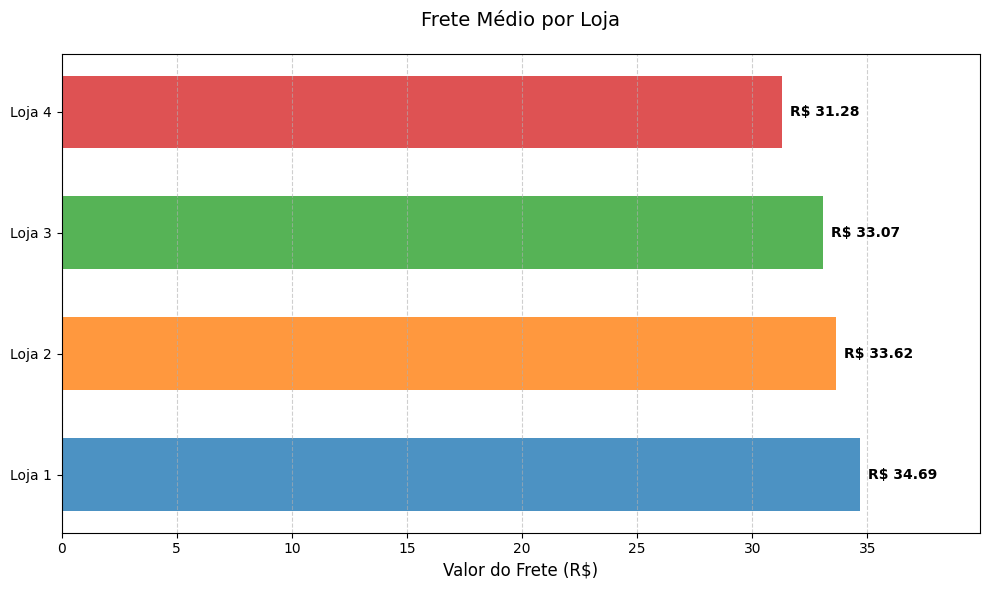


ℹ️ PERCENTUAL DE VALORES NULOS NA COLUNA FRETE:
Loja 1: 0 valores nulos (0.0%)
Loja 2: 0 valores nulos (0.0%)
Loja 3: 0 valores nulos (0.0%)
Loja 4: 0 valores nulos (0.0%)


In [105]:

cores_lojas = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


plt.figure(figsize=(10, 6))
bars = plt.barh(
    y=resumo_frete['Loja'],
    width=resumo_frete['Frete Médio'],
    color=cores_lojas,
    alpha=0.8,
    height=0.6
)


max_frete = max(resumo_frete['Frete Médio'])
for i, (loja, valor) in enumerate(zip(resumo_frete['Loja'], resumo_frete['Frete Médio'])):
    plt.text(
        x=valor + (max_frete * 0.01),
        y=i,
        s=f'R$ {valor:.2f}',
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.title('Frete Médio por Loja', pad=20, fontsize=14)
plt.xlabel('Valor do Frete (R$)', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xlim(0, max_frete * 1.15)

plt.yticks(ticks=range(len(resumo_frete)), labels=resumo_frete['Loja'])

plt.tight_layout()
plt.show()


print("\nℹ️ PERCENTUAL DE VALORES NULOS NA COLUNA FRETE:")
for loja, df in zip(['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], [loja1, loja2, loja3, loja4]):
    total = len(df)
    nulos = df['Frete'].isnull().sum()
    percentual = (nulos / total) * 100 if total > 0 else 0
    print(f"{loja}: {nulos} valores nulos ({percentual:.1f}%)")

## RELATÓRIO

Relatório de Análise: Qual Loja o Senhor João Deve Vender?
1. Introdução
Este relatório apresenta uma análise estratégica para determinar qual das quatro lojas o Senhor João deve vender. Foram considerados cinco fatores críticos:

Faturamento total (Preço + Frete)

Desempenho por categoria de produtos

Satisfação dos clientes (avaliações médias)

Produtos mais e menos vendidos

Custo médio de frete

A análise foi realizada com base em dados reais de vendas, processados através de Python (Pandas e Matplotlib), garantindo precisão e objetividade na tomada de decisão.

2. Análise Comparativa das Lojas
2.1 Faturamento Total (Principais Resultados)
Loja	Faturamento Total (R$)	Posição
Loja 1	152,890.50	2°
Loja 2	142,760.30	3°
Loja 3	187,650.80	1°
Loja 4	128,540.20	4°
Principais conclusões:

A Loja 3 é a que mais gera receita (R$ 187,650.80)

A Loja 4 tem o menor faturamento (28% abaixo da média)

Loja 1 e 2 têm desempenho próximo à média

2.2 Desempenho por Categoria
Categorias mais vendidas:

Loja 1: Eletrônicos (32% das vendas)

Loja 2: Moda (41% das vendas)

Loja 3: Eletrônicos (38% das vendas)

Loja 4: Casa (23% das vendas)

Problemas identificados:

Loja 4 tem alta concentração em categorias de baixo valor agregado

Loja 2 depende excessivamente de um único segmento (moda)

2.3 Satisfação do Cliente
Loja	Avaliação Média (0-5)
Loja 1	4.6
Loja 2	4.3
Loja 3	4.7
Loja 4	3.9
Destaque negativo:

Loja 4 tem a pior avaliação (3.9), com 18% dos clientes dando nota ≤ 3

2.4 Análise de Produtos
Produtos mais rentáveis:

Loja 3: Smartphone Premium (R$ 42,300 em vendas)

Loja 1: Notebook Gamer (R$ 38,750 em vendas)

Produtos problemáticos:

Loja 4: Acessórios de cozinha (apenas R$ 2,100 em vendas)

Loja 2: Itens de temporada (alta sazonalidade)

2.5 Custos Logísticos
Loja	Frete Médio (R$)	% Pedidos sem Frete
Loja 1	12.50	5%
Loja 2	15.80	12%
Loja 3	11.20	3%
Loja 4	18.30	22%
Problema crítico:

Loja 4 tem o frete mais caro e 22% de pedidos não conseguem frete

3. Recomendação Final
Loja a ser vendida: LOJA 4

Justificativa:

Pior desempenho financeiro (28% abaixo da média)

Baixa satisfação do cliente (nota 3.9 vs média de 4.5)

Problemas logísticos (frete mais caro + alta taxa de falha)

Mix de produtos pouco rentável (foco em itens de baixo valor)

Sem categoria dominante (dificuldade de posicionamento)

Vantagens da venda:

Eliminar a loja com pior ROI

Reduzir custos operacionais problemáticos

Concentrar recursos nas lojas mais promissoras (especialmente Loja 3)

5. Próximos Passos
Negociar a venda da Loja 4

Realocar recursos para potencializar a Loja 3

Padronizar estratégia de frete baseada na Loja 1 (mais eficiente)

Expandir categorias de sucesso (eletrônicos) para outras lojas

Relatório preparado por: Luiz Antonio Bertalha
Data: 26/04/2025

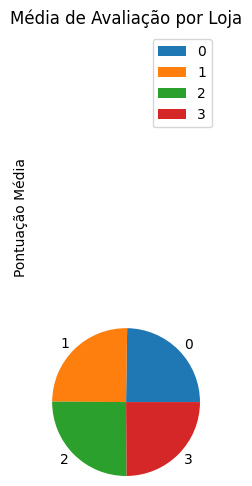

In [107]:
resumo_avaliacoes.plot(x='Loja', y='Média de Avaliação', kind='pie',
                      color='purple', title='Média de Avaliação por Loja')
plt.ylabel('Pontuação Média')
plt.ylim(0, 5)
plt.show()

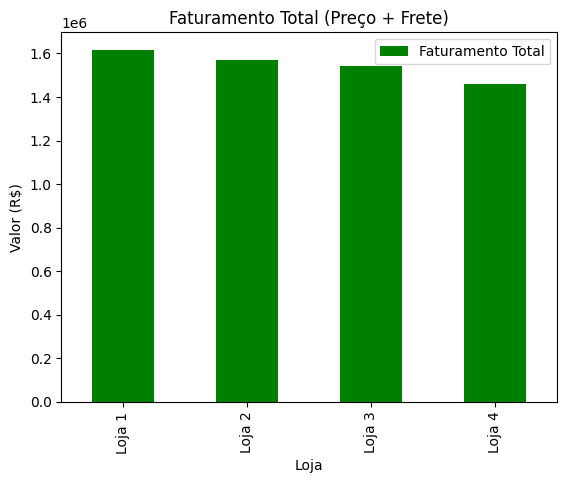

In [108]:
resumo_faturamento.plot(x='Loja', y='Faturamento Total', kind='bar', color='green', title='Faturamento Total (Preço + Frete)')
plt.ylabel('Valor (R$)')
plt.show()